The solutions manual also has some solutions. Tomoki also has solutions. I have tried to solve as many from the rest as possible.

In [60]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

Tomoki has solutions to all but $8.1.7$ and solutions manual also carries some solutions.

A discussion and an alternative proof for Corollary $8.1.1$ is in the following SE post.

https://stats.stackexchange.com/q/656832/183497

In [61]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [62]:
# Exercise 8.1.1
c = invert_norm(0.05)/5
print(c)
pwr = norm.cdf(c,-1,1/5)
print(pwr)

-0.3289794921875
0.9996033221426324


In [63]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

In [64]:
# Exercise 8.1.4
c = invert_chi2(0.95,10)
pwr = 1-chi2.cdf(c/2,10)
print(c,pwr)

18.3074951171875 0.5175772822527105


#### Exercise 8.1.7. 

Let $X_1, X_2, \cdots, X_n$ denote a random sample from a normal distribution $N(\theta,100)$. Show that $C = \{(x_1,x_2,\cdots,x_n) : c \leq \overline{x} = \sum_1^n x_i/n\}$ is a best critical region for testing $H_0 :\theta=75$ against $H_1 :\theta=78$. Find $n$ and $c$ so that

$$
P_{H_0} [(X_1, X_2,\cdots , X_n) \in C] = P_{H_0} (\overline{X} \geq c) = 0.05 \tag{1}
$$

and

$$
P_{H_1} [(X_1, X_2,\cdots , X_n) \in C] = P_{H_1} (\overline{X} \geq c) = 0.9 \tag{2}
$$

approximately.



#### Solution:

For the best critical region, we find the likelihood ratio as being

$$
\begin{align}
\frac{L(\theta';x)}{L(\theta'';x)} &= \exp{\left[ \frac{1}{200} \{ n(\theta'' - \theta'') -2 n \overline{x} (\theta'' - \theta'')\} \right]} \leq k \\
\implies \overline{x} & \geq \frac{n(\theta'' - \theta'') - k}{2n(\theta'' - \theta'')} = c
\end{align}
$$

where $\theta'' = 78$ and $\theta'' = 75$. Now $\overline{X} \sim N(\theta'/n,100/n)$ under $H_0$. So from condition of equation $(1)$ above, we have 

$$
c = \theta'+\frac{10}{\sqrt{n}}\Phi^{-1}(0.95)
$$

where $\Phi()$ is the cdf of standard normal distribution. From equation $(2)$, we get

$$
c = \theta''+\frac{10}{\sqrt{n}}\Phi^{-1}(0.1)
$$

From these, we can solve for $n$ and $c$ as shown below.

In [65]:
m1 = invert_norm(0.95)
m2 = invert_norm(0.1)

In [66]:
n = np.ceil(100*((m1-m2)/(3))**2)

In [67]:
c = 75 + 10/np.sqrt(n)*m1

In [68]:
print(n,c)

96.0 76.67881644104021


A point to be noted is that if $n$ turns out to be a fraction, it appears that we should round it to the next higher integer (based on the answer at the back of the book even though they do not mention about rounding issue). I think this is because if we need to satisfy the conditions in equations $(1)$ and $(2)$, we'd need to take the higher value of $n$.

As seen below, when we round it to a lower integer value namely $n=95$, significance level is higher than $0.05$ even though power seems to be higher than $0.9$. However, with $n=96$, both the significance level and the power seem to satisfy our requirement.

So when it comes to rounding the sample size to a whole number, we should always round it to the next higher value.

In [69]:
nlist = [i for i in range(90,101,1)]

siglist = []
powlist = []

for i in nlist:
    thissig = 1-norm.cdf(c, loc=75, scale=10/np.sqrt(i))
    thispow = 1-norm.cdf(c, loc=78, scale=10/np.sqrt(i))
    siglist.append(thissig)
    powlist.append(thispow)

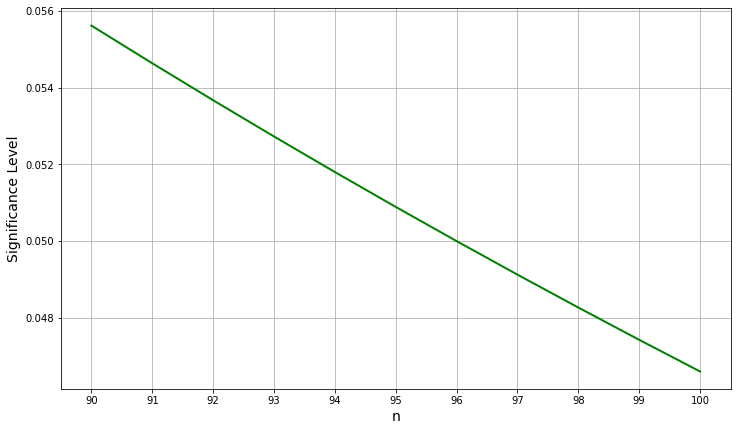

In [70]:
plt.figure(figsize = (12,7))

plt.plot(nlist,siglist,linewidth=2,color='g')
plt.ylabel('Significance Level',fontsize=14)
plt.xlabel('n',fontsize=14)
plt.xticks(nlist)
plt.grid()
plt.show()

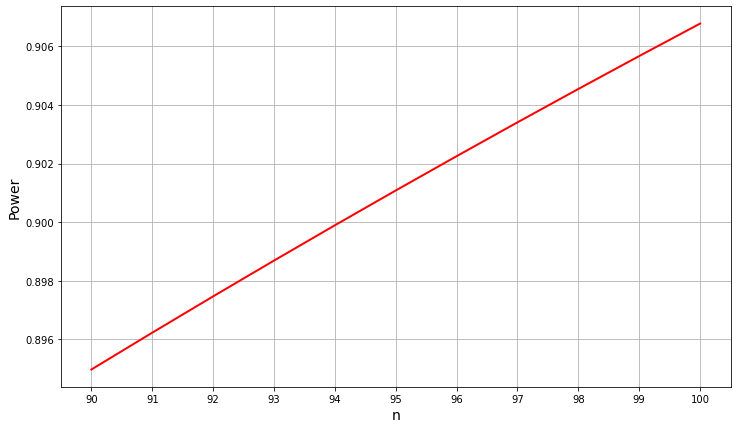

In [71]:
plt.figure(figsize = (12,7))

plt.plot(nlist,powlist,linewidth=2,color='r')
plt.ylabel('Power',fontsize=14)
plt.xlabel('n',fontsize=14)
plt.xticks(nlist)
plt.grid()
plt.show()